In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

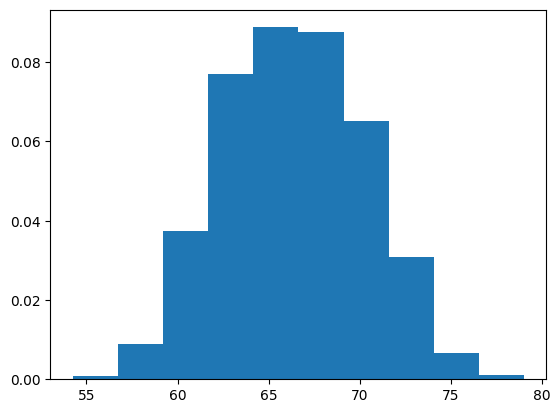

In [12]:
df = pd.read_csv("weight-height.csv")
a,b,c = plt.hist(df["Height"],bins=10,density=True)

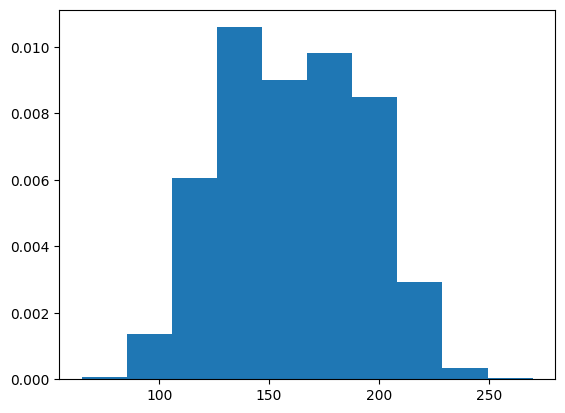

In [15]:
count,bins,plot = plt.hist(df["Weight"],bins=10,density=True)

In [30]:
IQR_height = df["Height"].quantile(0.75) - df["Height"].quantile(0.25)
IQR_weight = df["Weight"].quantile(0.75) - df["Weight"].quantile(0.25)
print(df[df["Height"] < (df["Height"].quantile(0.25) - 1.5 * IQR_height)])
print(df[df["Height"] > (df["Height"].quantile(0.75) + 1.5 * IQR_height)])

      Gender     Height     Weight
6624  Female  54.616858  71.393749
7294  Female  54.873728  78.606670
9285  Female  54.263133  64.700127
     Gender     Height      Weight
994    Male  78.095867  255.690835
1317   Male  78.462053  227.342565
2014   Male  78.998742  269.989699
3285   Male  78.528210  253.889004
3757   Male  78.621374  245.733783


In [36]:
df = df[(df["Height"] > (df["Height"].quantile(0.25) - 1.5 * IQR_height)) & (df["Height"] < (df["Height"].quantile(0.75) + 1.5 * IQR_height))]

In [41]:
print(df[df["Weight"] < (df["Weight"].quantile(0.25) - 1.5 * IQR_weight)])
print(df[df["Weight"] > (df["Weight"].quantile(0.75) + 1.5 * IQR_weight)])

#The outlier in the weight column is already removed while filtering the height column

Empty DataFrame
Columns: [Gender, Height, Weight]
Index: []
Empty DataFrame
Columns: [Gender, Height, Weight]
Index: []


In [38]:
df = df[(df["Weight"] > (df["Weight"].quantile(0.25) - 1.5 * IQR_weight)) & (df["Weight"] < (df["Weight"].quantile(0.75) + 1.5 * IQR_weight))]
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


np.float64(0.9243144361109648)

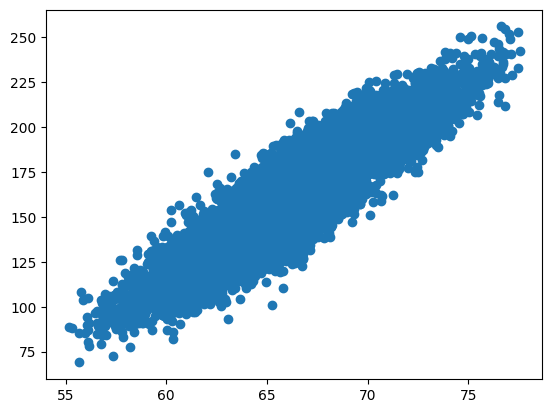

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df["Height"],df["Weight"])
df["Height"].corr(df["Weight"])

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedGroupKFold,train_test_split
x,xx,y,yy = train_test_split(df[["Height"]],df["Weight"],train_size=0.8,random_state=10)
model = LinearRegression()
print(cross_val_score(model,df[["Height"]],df["Weight"],cv=20))
model.fit(x,y)
model.score(xx,yy)

[0.52217592 0.56891397 0.56867347 0.68428493 0.64350964 0.59241768
 0.57079436 0.60628808 0.65281588 0.63005395 0.54931726 0.62028649
 0.55625763 0.5636943  0.53674213 0.64497417 0.60485762 0.60400151
 0.50500101 0.5767812 ]


0.8568377880380618